Dataset contains simultaneous recordings of 10,000 or 20,000 neurons from mouse visual cortex either during the presentation of gratings or during spontaneous behaviors like running, whisking and sniffing. These datasets are a little more advanced because you have to work with many neurons simultaneously. They are exciting, because they give a taste of what’s to come in neuroscience.

The main question for this notebook is:

Which Neurons in visual cortex contain the most information about pupil area? Compute the decoding accuracy from neurons at different cortical depths

Breakdown:

Given:
   - Array of neural responses of over 11_000 neurons (nerurons x response)
      - Explanatory Variable -> 11K regressors
  - Array of pupil response.
    - Response Variable -> 1K regresses

Todo
 - Determine with neurons in visual cortex contain the most information about the pupil area
    - Which neurons (rows) can we remove?
    - Are these neurons at the same depth?
    - Are some depths more helpful than others?


In [1]:
import matplotlib.pyplot as plt
import numpy as np
dat = np.load('stringer_spontaneous.npy', allow_pickle=True).item()
print(dat.keys())
#Looking at our dat
neural_resp = dat['sresp']
pupil_resp = dat['pupilArea']
print("neural response data_size:",neural_resp.shape) #(time, neuron)
print("pupil response data_size:", pupil_resp.shape) #(pupil output)

dict_keys(['sresp', 'run', 'beh_svd_time', 'beh_svd_mask', 'stat', 'pupilArea', 'pupilCOM', 'xyz'])
neural response data_size: (11983, 7018)
pupil response data_size: (7018, 1)


In [6]:
# We create our covariance matrix; it's big so it takes awhile
μ = neural_resp.mean(axis=1)
N = neural_resp.shape[0]
X = neural_resp- μ[:,np.newaxis]
cov = (1 / N) * ( X @ X.T)

In [7]:
# We get the SVD of the data; because we know that it is hermitian we can use a more efficient implementation
U, Λ, V = np.linalg.svd(cov, hermitian=True)

In [8]:
np.save("left_matrix", U, allow_pickle=True)
np.save("singular_values", Λ, allow_pickle=True)
np.save("right_matrix",V, allow_pickle=True)c

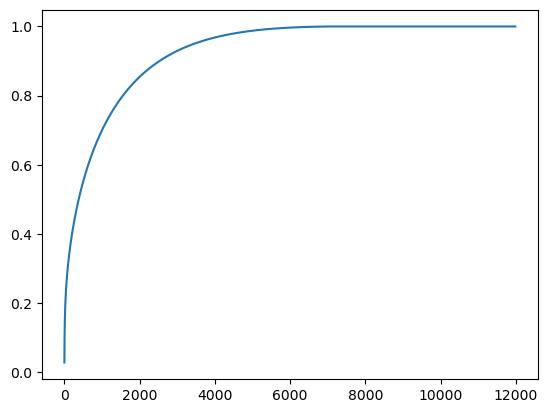

In [10]:
# only need first 3000 or so
sorti = np.flip(np.argsort(Λ))
cumsum = np.cumsum(Λ[sorti]) / Λ.sum()
plt.plot(cumsum)


In [15]:
#projection
thresh = 4000
x̃ = U[:, sorti]
x̃ = x̃[:,:thresh].T @ X
x̃.shape

(4000, 7018)

(4000, 7018)

In [35]:
x̃.shape

(4000, 7018)

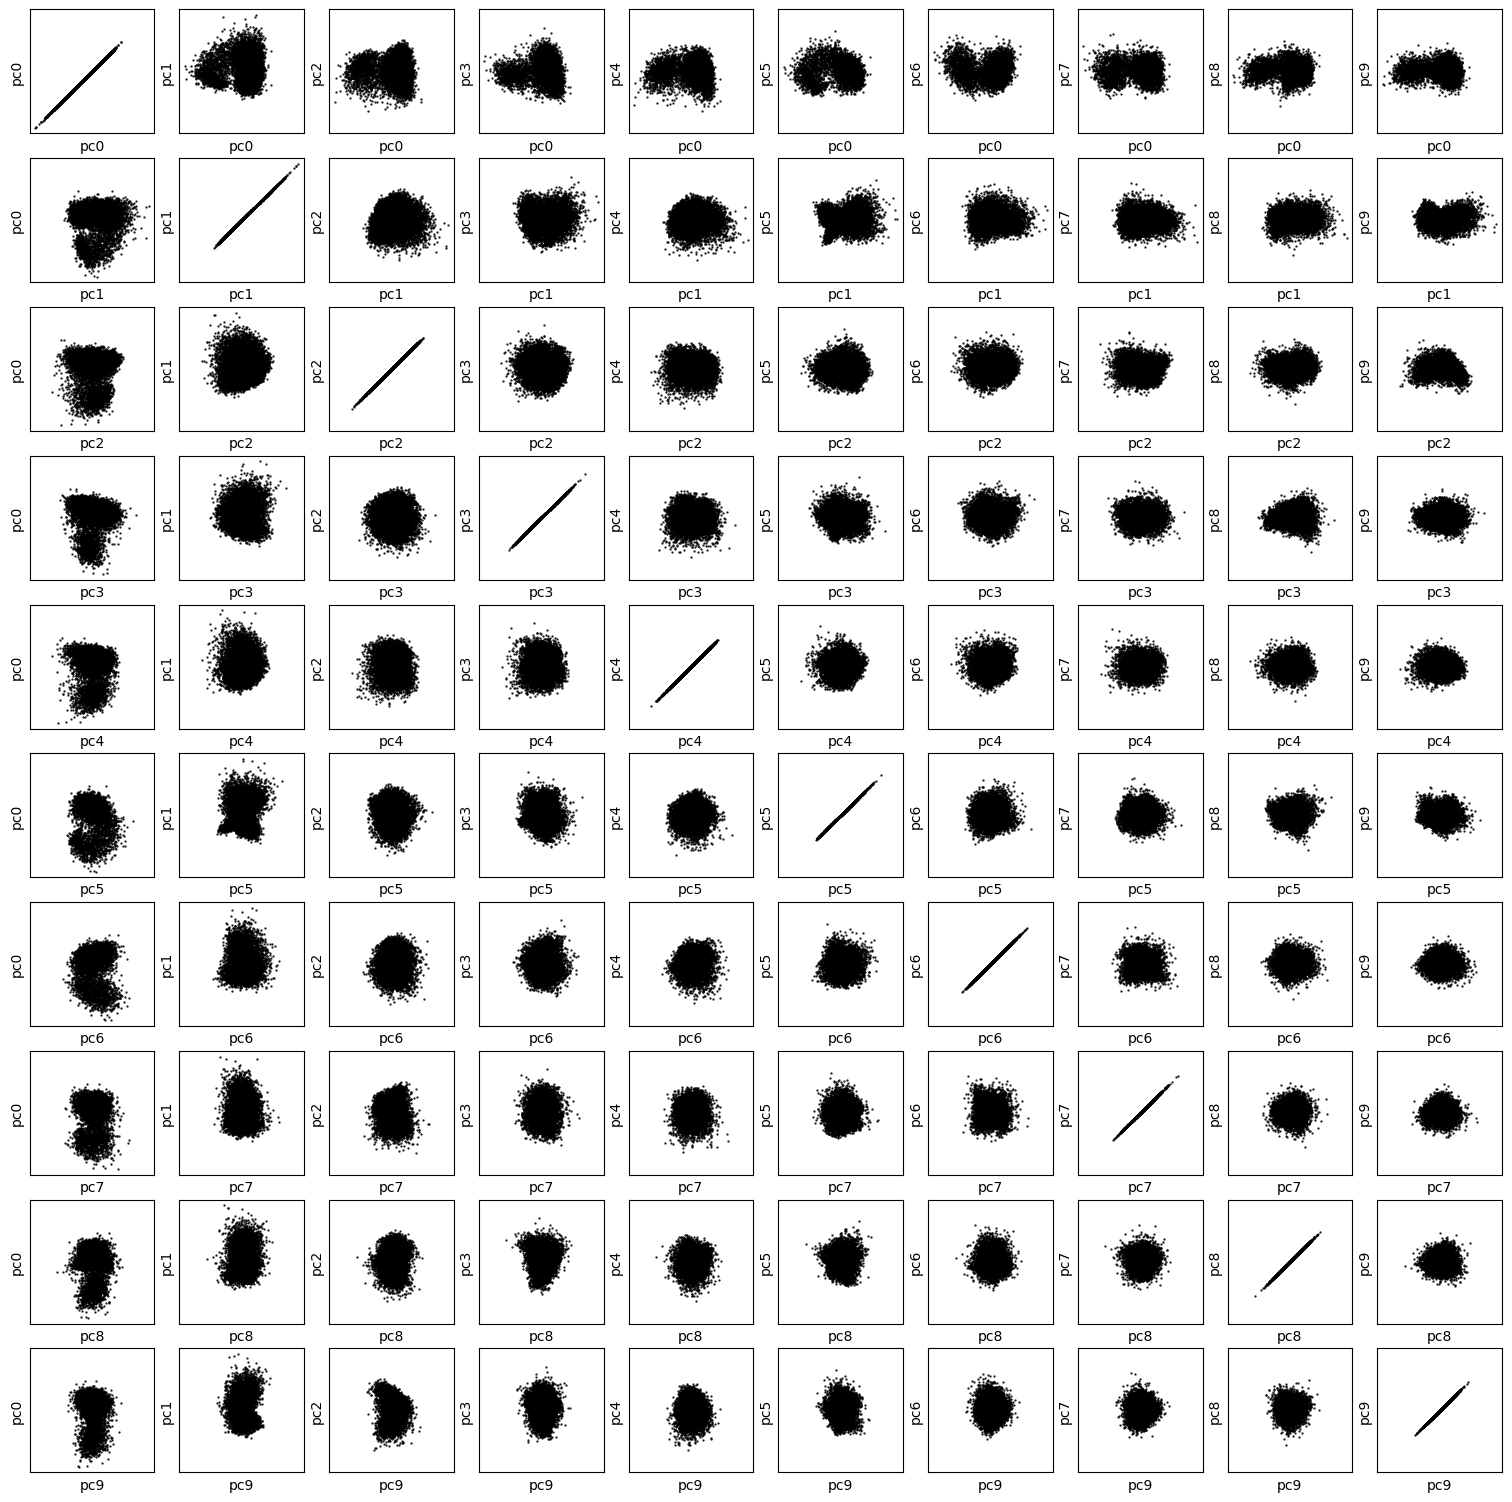

In [39]:
rows = cols = 10
fig, ax = plt.subplots(rows,cols, sharex=True, sharey=True, figsize=(rows*1.9,cols*1.9))
for row in range(rows):
    for col in range(cols):
        ax[row,col].scatter(x̃[row,:], x̃[col,:], c='k', s=.5, alpha=0.8)
        ax[row,col].set_xticks([])
        ax[row,col].set_yticks([])
        ax[row,col].set_xlabel(f"pc{row}")
        ax[row,col].set_ylabel(f"pc{col}")

# first few in neural activity / data
# filter the neural data, maybe noise 


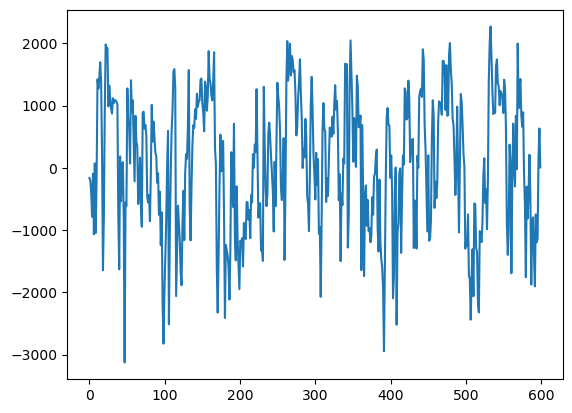

In [47]:
first_PC = x̃[2,:]
time = np.arange(0,len(first_PC))*1.2
plt.plot(time[:500], first_PC[:500])
# maybe apply filtering?

In [17]:
np.save("rotated_top_4k_PC_data", x̃, allow_pickle=True)

In [21]:
#sphereing
sortd = Λ[sorti]
sortd = sortd[:thresh]
ϵ = 1e-5
λs = np.power(np.diag(sortd + ϵ), 1/2 )

In [22]:
λs.shape

(4000, 4000)

In [23]:
x̂_rotated = λs @ x̃

In [34]:
np.save("projected_sphered_data", x̂_rotated, allow_pickle=True)

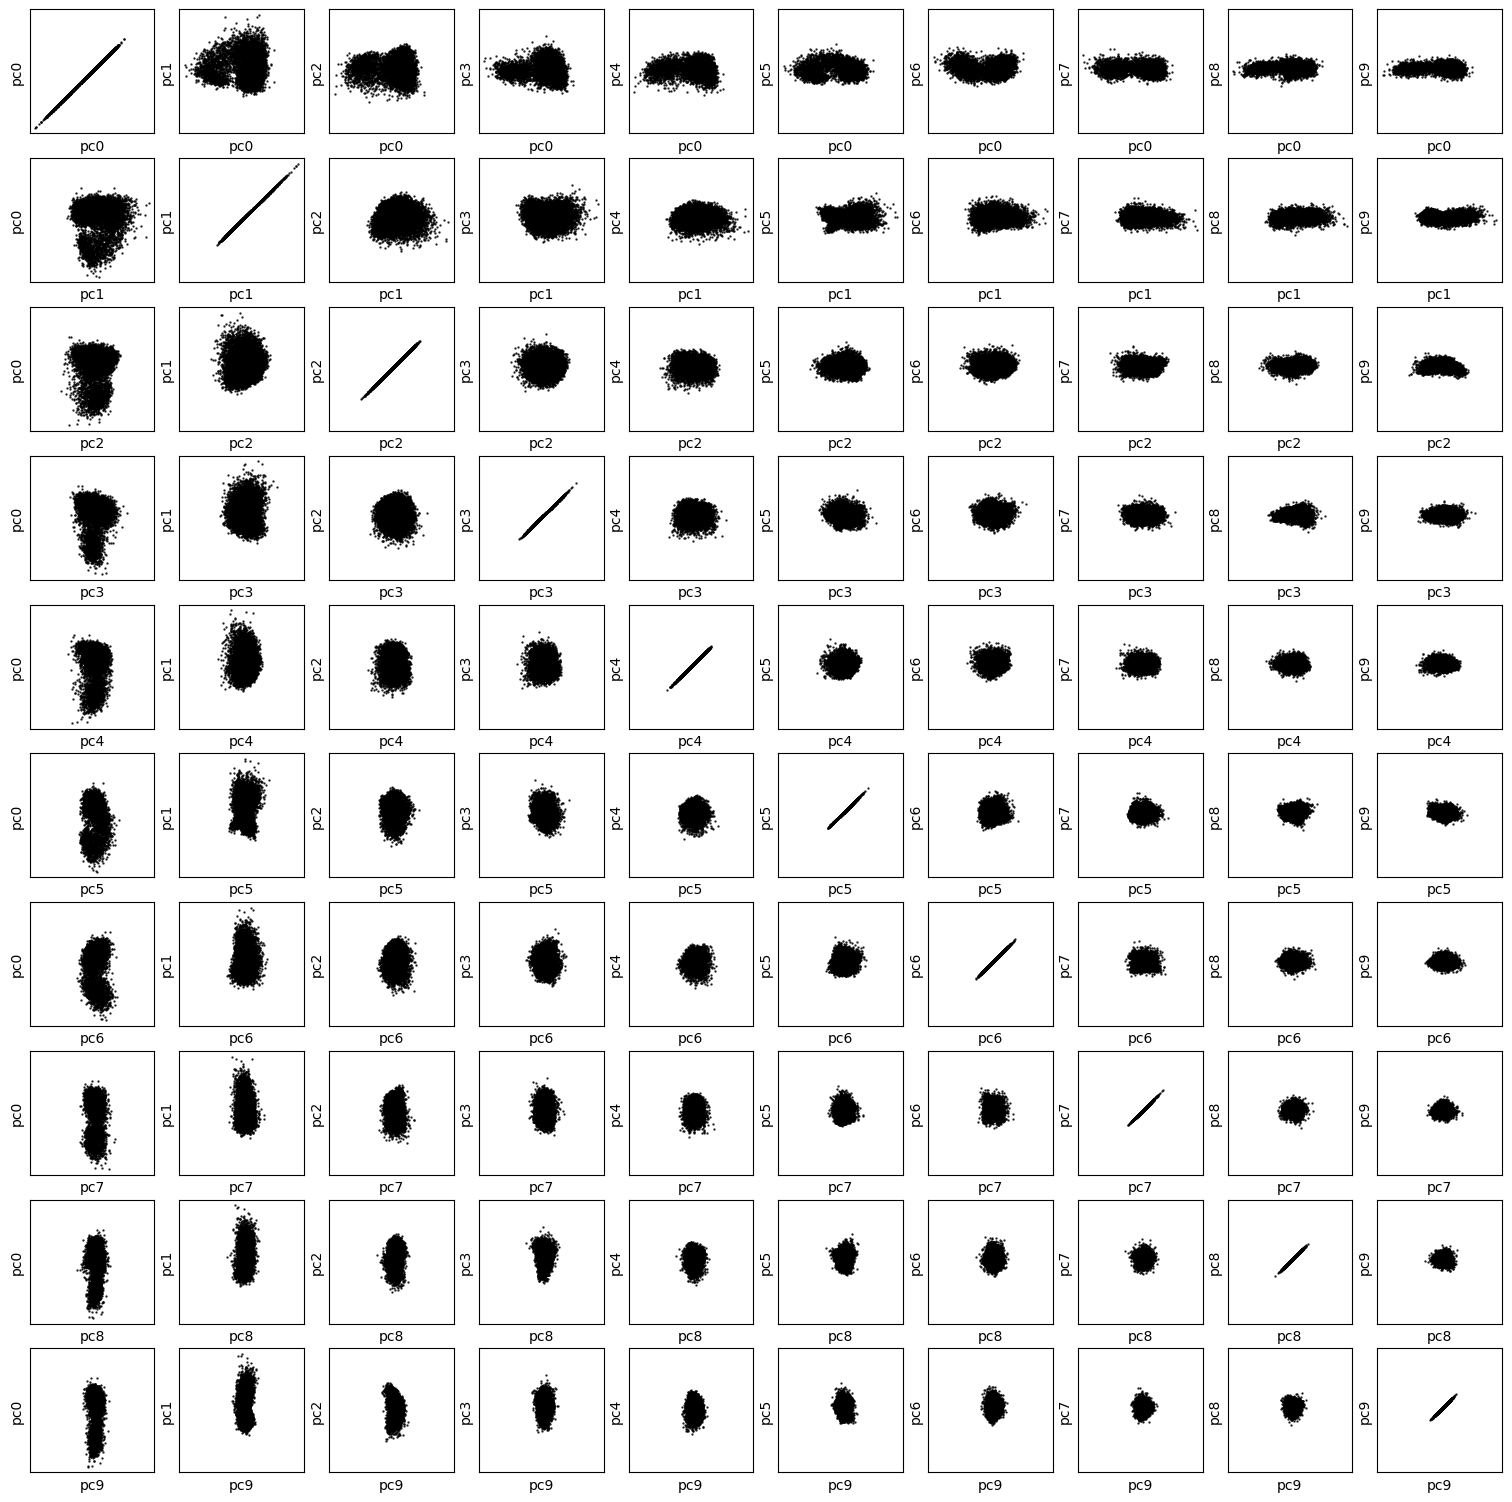

In [33]:
rows = cols = 10
fig, ax = plt.subplots(rows,cols, sharex=True, sharey=True, figsize=(rows*1.9,cols*1.9))
for row in range(rows):
    for col in range(cols):
        ax[row,col].scatter(x̂_rotated[row,:], x̂_rotated[col,:], c='k', s=.5, alpha=0.8)
        ax[row,col].set_xticks([])
        ax[row,col].set_yticks([])
        ax[row,col].set_xlabel(f"pc{row}")
        ax[row,col].set_ylabel(f"pc{col}")
